In [74]:
import torch


In [3]:
print(torch.cuda.is_available())

True


In [75]:
from pyabsa import ABSAInstruction

In [32]:
generator = ABSAInstruction.ABSAGenerator(
        "checkpoints/multitask/kevinscariaate_tk-instruct-base-def-pos-neg-neut-combined-instruction/checkpoint-5472")

In [17]:
generator_less_cat = ABSAInstruction.ABSAGenerator(
        "checkpoints/multitask/kevinscariaate_tk-instruct-base-def-pos-neg-neut-combined-instruction/checkpoint-7296")

In [23]:
generator_cat = ABSAInstruction.ABSAGenerator(
        "checkpoints/multitask/kevinscariaate_tk-instruct-base-def-pos-neg-neut-combined-instruction/checkpoint-9807")

In [34]:
example = [
        "Beautiful , comfortable and friendly hotel near the beach . Great value for the money . Good situation , next to a big mall and the beach . Rooms really comfortable , clean and no noisy . Wifi excellent .",
        "Room veeeeery big , comfortable big bed , hot shower , lush garden , pool and breakfast for 130k IDR in high season : what U want more ? Ok , no towel or sheet but . .",
        "room without power plug point , hair dryer , water boiler , safe box and even tissue . They don ' t have any queen size bed as well . people were friend but all yr request then will not care . its very small and the wifi is totally suck here .",
        "The accomodation was great given the price 30 $ per night i got from booking . com . the hotel was clean and two swiming pools to cool off the bali heat . The location - seminyak is great , great for a chilled out people . Very close Peti ( something ) and seminyak beach a taxi will offset you less than 3 $ .",
        "We stayed at the Maharani with another five friends and had the best time . Staff great friendly and entertaining . Rooms light , airy and clean . They accommodated us by putting all our rooms together side by side . Great location on poppies lane 1 and beach across the road , short walk to markets and shopping . Would recommend a stay here as when we return will be staying again .",
        "This is good hotel for you stay for a while in Singaraja if you find good and cheap hotel . The view is good near of the beach and it has 1 swimming pool . The bedroom is clean and service is good . But the parking is not large enough ."
    ]

In [41]:
example2 = [
    "this hotel has beautiful pool, the breakfast is so goood, but the room is dirty and the service is quite bad",
    "the hotel is near to the pandawa beach, you can go to the bar near the hotel at night, also there is a lot of restaurant. this hotel is near to the airport"
]

In [42]:
for example in example2:
    result = generator_less_cat.predict(example)

{'text': 'this hotel has beautiful pool, the breakfast is so goood, but the room is dirty and the service is quite bad', 'Quadruples': [{'aspect': 'pool', 'polarity': 'POS', 'opinion': 'beautiful', 'category': 'FACILITY#POOL'}, {'aspect': 'breakfast', 'polarity': 'NEU', 'opinion': 'goood', 'category': 'FOOD#TASTE'}, {'aspect': 'room', 'polarity': 'NEG', 'opinion': 'dirty', 'category': '#CLEANLINESS'}, {'aspect': 'service', 'polarity': 'NEG', 'opinion': 'bad', 'category': 'SERVICE#GENERAL'}]}
{'text': 'the hotel is near to the pandawa beach, you can go to the bar near the hotel at night, also there is a lot of restaurant. this hotel is near to the airport', 'Quadruples': [{'aspect': 'pandawa beach', 'polarity': 'POS', 'opinion': 'near', 'category': 'LOCATION#ATTRACTIONS'}, {'aspect': 'bar', 'polarity': 'POS', 'opinion': 'near', 'category': 'LOCATION#ENTERTAINMENT'}, {'aspect': 'restaurant', 'polarity': 'POS', 'opinion': 'lot', 'category': 'LOCATION#NEARBY_AMENITIES'}, {'aspect': 'airpor

In [ ]:
for example in example:
    result = generator_less_cat.predict(example)

In [35]:
for example in example:
    result = generator.predict(example)

{'text': 'Beautiful , comfortable and friendly hotel near the beach . Great value for the money . Good situation , next to a big mall and the beach . Rooms really comfortable , clean and no noisy . Wifi excellent .', 'Quadruples': [{'aspect': 'hotel', 'polarity': 'POS', 'opinion': 'Beautiful', 'category': 'HOTEL#GENERAL'}, {'aspect': 'beach', 'polarity': 'POS', 'opinion': 'friendly', 'category': '#EXPERIENCE'}, {'aspect': 'money', 'polarity': 'POS', 'opinion': 'near', 'category': 'LOCATION#ATTRACTIONS'}, {'aspect': 'situation', 'polarity': 'POS', 'opinion': 'Great', 'category': '#PRICE'}, {'aspect': 'mall', 'polarity': 'POS', 'opinion': 'Good', 'category': '#EXPERIENCE'}, {'aspect': 'beach', 'polarity': 'POS', 'opinion': 'near', 'category': 'LOCATION#ENTERTAINMENT'}, {'aspect': 'Rooms', 'polarity': 'POS', 'opinion': 'near', 'category': 'LOCATION#ATTRACTIONS'}, {'aspect': 'Wifi', 'polarity': 'POS', 'opinion': 'comfortable', 'category': '#EXPERIENCE'}]}
{'text': 'Room veeeeery big , comf

In [31]:
for example in example:
    result = generator.predict(example)

{'text': 'o', 'Quadruples': [{'aspect': 'o', 'polarity': 'POS', 'opinion': 'o', 'category': 'HOTEL#GENERAL'}, {'aspect': 'everything', 'polarity': 'POS', 'opinion': 'o', 'category': 'HOTEL#GENERAL'}]}


Inference for single sentence model

In [9]:
import json
import csv

# Path to your JSONL file
jsonl_file_path = 'inference-test-ss.jsonl'

# Path to the output CSV file
csv_file_path = 'extracted_texts_ss_test.csv'

# Open the JSONL file and the CSV file
with open(jsonl_file_path, 'r') as jsonl_file, open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # Read each line in the JSONL file
    for line in jsonl_file:
        # Parse the JSON object
        json_obj = json.loads(line.strip())
        
        # Extract the text field
        text = json_obj['text']
        
        # Write the text to the CSV file
        csv_writer.writerow([text])

print(f'Texts have been successfully extracted to {csv_file_path}')


Texts have been successfully extracted to extracted_texts_ss_test.csv


In [25]:
generator_ss_model = ABSAInstruction.ABSAGenerator(
        "checkpoints/multitask/kevinscariaate_tk-instruct-base-def-pos-neg-neut-combined-quadruple-ss/checkpoint-17028")

In [84]:
ex_ss = [
    "this hotel has beautiful pool, the breakfast is so goood, but the room is dirty and the service is quite bad",
    "the hotel is near to the pandawa beach, you can go to the bar near the hotel at night, also there is a lot of restaurant. this hotel is near to the airport"
]

In [85]:
{"text": "but nice hotel for budget traveller .", "labels": [{"aspect": "budget", "opinion": "nice", "polarity": "POS", "category": "HOTEL#PRICE"}]}
{"text": "We moved to this Hotel because its closer to the Double Six Beach .", "labels": [{"aspect": "Hotel", "opinion": "moved", "polarity": "NEU", "category": "LOCATION#GENERAL"}, {"aspect": "Beach", "opinion": "closer", "polarity": "POS", "category": "LOCATION#VIEW"}]}
{"text": "The room smelled very musty , it was unclean and dirty .", "labels": [{"aspect": "room", "opinion": "smelled", "polarity": "NEG", "category": "ROOM#CLEANLINESS"}, {"aspect": "room", "opinion": "unclean", "polarity": "NEG", "category": "ROOM#CLEANLINESS"}, {"aspect": "room", "opinion": "dirty", "polarity": "NEG", "category": "ROOM#CLEANLINESS"}]}


{'text': 'The room smelled very musty , it was unclean and dirty .',
 'labels': [{'aspect': 'room',
   'opinion': 'smelled',
   'polarity': 'NEG',
   'category': 'ROOM#CLEANLINESS'},
  {'aspect': 'room',
   'opinion': 'unclean',
   'polarity': 'NEG',
   'category': 'ROOM#CLEANLINESS'},
  {'aspect': 'room',
   'opinion': 'dirty',
   'polarity': 'NEG',
   'category': 'ROOM#CLEANLINESS'}]}

In [86]:
for example in ex_ss:
    result = generator_ss_model_less_cat.predict(example)

c:\Users\hongk\Documents\GitHub\ta-final-project-aspect-based-sentiment-analysis-and-categorized-aspect\venv-absa-3.9\lib\site-packages\transformers\generation\utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
c:\Users\hongk\Documents\GitHub\ta-final-project-aspect-based-sentiment-analysis-and-categorized-aspect\venv-absa-3.9\lib\site-packages\transformers\generation\utils.py:1313: UserWarning: Using `max_length`'s default (128) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'text': 'this hotel has beautiful pool, the breakfast is so goood, but the room is dirty and the service is quite bad', 'Quadruples': [{'aspect': 'hotel', 'polarity': 'POS', 'opinion': 'beautiful pool', 'category': 'HOTEL#GENERAL'}, {'aspect': 'pool', 'polarity': 'POS', 'opinion': 'good', 'category': 'FACILITY#POOL'}, {'aspect': 'breakfast', 'polarity': 'POS', 'opinion': 'dirty', 'category': 'FOOD#TASTE'}, {'aspect': 'room', 'polarity': 'NEG', 'opinion': 'bad', 'category': 'ROOM#CLEANLINESS'}]}
{'text': 'the hotel is near to the pandawa beach, you can go to the bar near the hotel at night, also there is a lot of restaurant. this hotel is near to the airport', 'Quadruples': [{'aspect': 'pandawa beach', 'polarity': 'POS', 'opinion': 'near', 'category': 'LOCATION#ATTRACTIONS'}, {'aspect': 'restaurant', 'polarity': 'POS', 'opinion': 'lot', 'category': 'LOCATION#NEARBY_AMENITIES'}]}


single sentences

In [78]:
generator_ss_model_less_cat = ABSAInstruction.ABSAGenerator(
        "checkpoints/multitask/kevinscariaate_tk-instruct-base-def-pos-neg-neut-combined-quadruple-ss-less-cat/checkpoint-17028")

In [80]:
import json
import pandas as pd

# Path to the JSONL file
file_path = 'ABSADatasets/datasets/acos_datasets/5000.Hotel-ss-less-cat/test.jsonl'  # Replace with the path to your JSONL file

# Read the JSONL file
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Extract the text and convert to DataFrame
df = pd.DataFrame(data)[['text']]

# Save to CSV
csv_file = 'ss_less_cat_text.csv'  # Path where you want to save the CSV file
df.to_csv(csv_file, index=False)

print(f'Text data has been saved to {csv_file}')


Text data has been saved to ss_less_cat_text.csv


In [89]:

# Read the CSV file with text data
input_csv = 'ss_less_cat_text.csv'  # Replace with the path to your input CSV file
df = pd.read_csv(input_csv)

# Assuming the text column is named 'text'
texts = df['text'].tolist()
print(texts)
# Make predictions using the model
# Adjust this line if your model requires a different method to predict
predictions = [generator_ss_model_less_cat.predict(text) for text in texts]


['Suk su ma ! Overall Melia staff were amazing ! .', 'Great food , drinks , atmosphere and the service was amazing .', 'Big thanks to all the staff and especially Pringga who always had a smile on his face and went out of his way to make sure we had the best stay possible .', 'Great service , very good food very friendly and welcoming staff .', 'Very affordable rates for the very spacious room and comfortable rooms .', 'Fantastic hotel , beautifully landscaped gardens , swings at the beach and very friendly hotel staff ! The temperature in the main restaurant was always a bit too cold .', 'It is recommended to take a sweater with you when you go for dinner .', 'Great place to stay with family .', 'Nice private beach without waves .', 'Area itself is quit big , with lots of attractions .', 'Super lovely service and all stuff that works in hotel is highly qualified and friendly , especially , I would like to recognize Resi ! The only drawback - prices in restaurant , except on that , eve

c:\Users\hongk\Documents\GitHub\ta-final-project-aspect-based-sentiment-analysis-and-categorized-aspect\venv-absa-3.9\lib\site-packages\transformers\generation\utils.py:1313: UserWarning: Using `max_length`'s default (128) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'text': 'Suk su ma ! Overall Melia staff were amazing ! .', 'Quadruples': [{'aspect': 'staff', 'polarity': 'POS', 'opinion': 'amazing', 'category': 'SERVICE#GENERAL'}]}
{'text': 'Great food , drinks , atmosphere and the service was amazing .', 'Quadruples': [{'aspect': 'food', 'polarity': 'POS', 'opinion': 'Great', 'category': 'FOOD#TASTE'}, {'aspect': 'drinks', 'polarity': 'POS', 'opinion': 'Great', 'category': 'FOOD#TASTE'}, {'aspect': 'atmosphere', 'polarity': 'POS', 'opinion': 'Great', 'category': 'EXPERIENCE,AMBIENCE'}, {'aspect': 'service', 'polarity': 'POS', 'opinion': 'amazing', 'category': 'SERVICE#GENERAL'}]}
{'text': 'Big thanks to all the staff and especially Pringga who always had a smile on his face and went out of his way to make sure we had the best stay possible .', 'Quadruples': [{'aspect': 'staff', 'polarity': 'POS', 'opinion': 'thanks', 'category': 'SERVICE#GENERAL'}]}
{'text': 'Great service , very good food very friendly and welcoming staff .', 'Quadruples': [{'a

KeyError: 'quadruple'

In [91]:
predictions

[{'text': 'Suk su ma ! Overall Melia staff were amazing ! .',
  'Quadruples': [{'aspect': 'staff',
    'polarity': 'POS',
    'opinion': 'amazing',
    'category': 'SERVICE#GENERAL'}]},
 {'text': 'Great food , drinks , atmosphere and the service was amazing .',
  'Quadruples': [{'aspect': 'food',
    'polarity': 'POS',
    'opinion': 'Great',
    'category': 'FOOD#TASTE'},
   {'aspect': 'drinks',
    'polarity': 'POS',
    'opinion': 'Great',
    'category': 'FOOD#TASTE'},
   {'aspect': 'atmosphere',
    'polarity': 'POS',
    'opinion': 'Great',
    'category': 'EXPERIENCE,AMBIENCE'},
   {'aspect': 'service',
    'polarity': 'POS',
    'opinion': 'amazing',
    'category': 'SERVICE#GENERAL'}]},
 {'text': 'Big thanks to all the staff and especially Pringga who always had a smile on his face and went out of his way to make sure we had the best stay possible .',
  'Quadruples': [{'aspect': 'staff',
    'polarity': 'POS',
    'opinion': 'thanks',
    'category': 'SERVICE#GENERAL'}]},
 {'t

In [92]:
# Convert predictions to DataFrame
texts = [pred['text'] for pred in predictions]
quadruples = [pred['Quadruples'] for pred in predictions]

df_predictions = pd.DataFrame({
    'text': texts,
    'quadruples': quadruples
})

# Save predictions to a new CSV file
output_csv = 'output_predictions_ss_less_cat.csv'
df_predictions.to_csv(output_csv, index=False)
print(f'Predictions saved to {output_csv}')

Predictions saved to output_predictions_ss_less_cat.csv


<Figure size 1000x600 with 0 Axes>

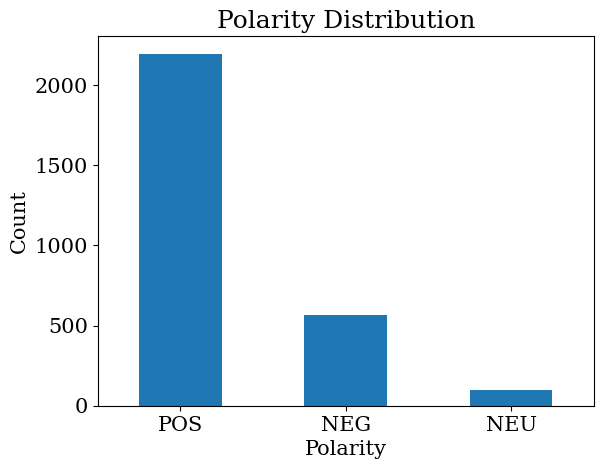

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import defaultdict, Counter
# Path to the CSV file with text and predictions
input_csv = 'output_predictions_ss_less_cat.csv'  # Replace with the path to your input CSV file

# Load the CSV file into a DataFrame
df_predictions = pd.read_csv(input_csv)


# Extract the quadruples (converting string representation to list of dictionaries)
df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Extract polarity values
polarities = []
for quads in df_predictions['quadruples']:
    for quad in quads:
        polarities.append(quad['polarity'])

# Count occurrences of each polarity
polarity_counts = Counter(polarities)

# Create a DataFrame for visualization
polarity_df = pd.DataFrame.from_dict(polarity_counts, orient='index', columns=['count'])

# Plot the polarity distribution
plt.figure(figsize=(10, 6))
polarity_df.plot(kind='bar', legend=False)
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


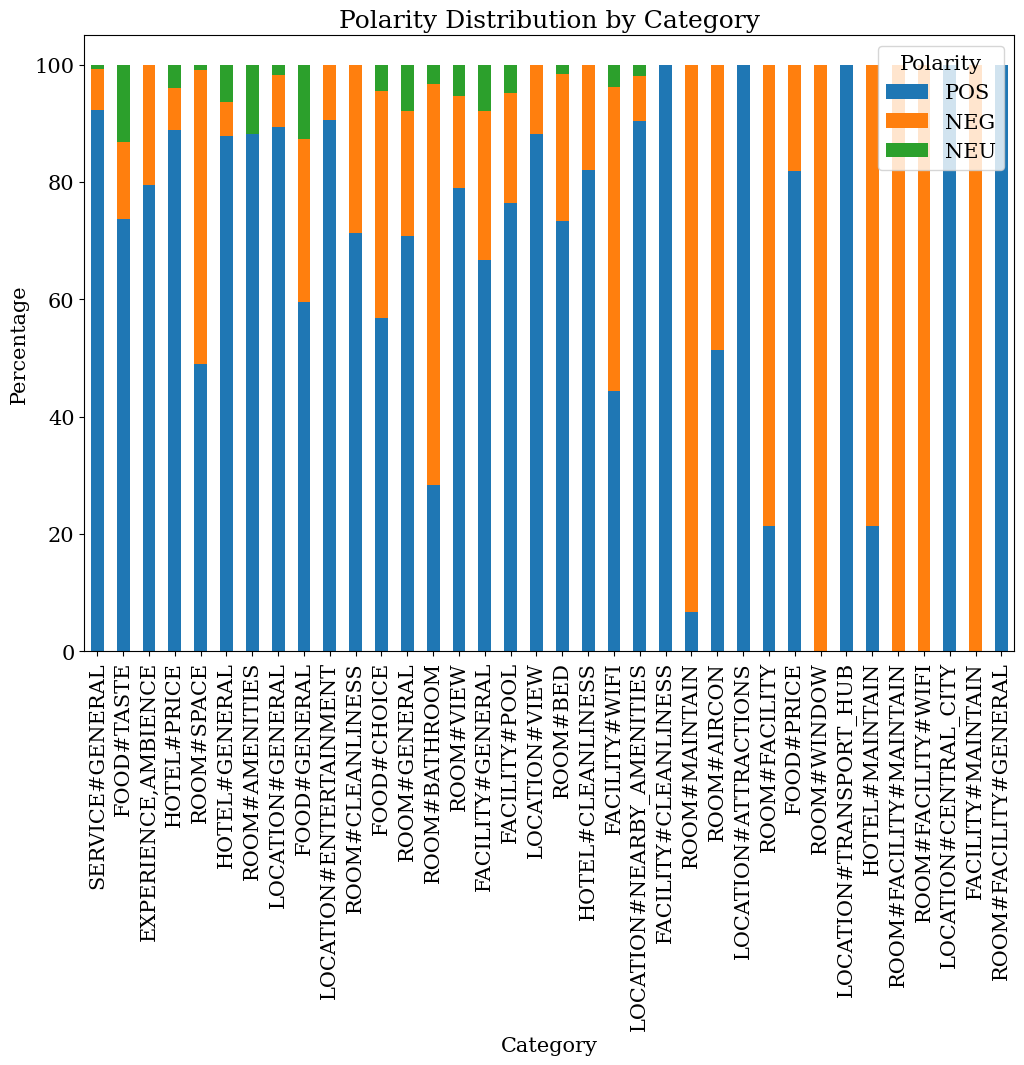

In [108]:
# Check the type of the first element in the quadruples column to determine if conversion is needed
if isinstance(df_predictions['quadruples'].iloc[0], str):
    # Convert the 'quadruples' column from string representation to list of dictionaries
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Extract polarity and category values
category_polarity_counts = defaultdict(Counter)

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category']
        polarity = quad['polarity']
        category_polarity_counts[category][polarity] += 1

# Convert to a DataFrame for visualization
category_polarity_df = pd.DataFrame(category_polarity_counts).fillna(0).astype(int).T

# Calculate the percentage distribution of each polarity for each category
category_polarity_percent_df = category_polarity_df.div(category_polarity_df.sum(axis=1), axis=0) * 100

# Plot the polarity distribution for each category
category_polarity_percent_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Polarity Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(title='Polarity')
plt.show()

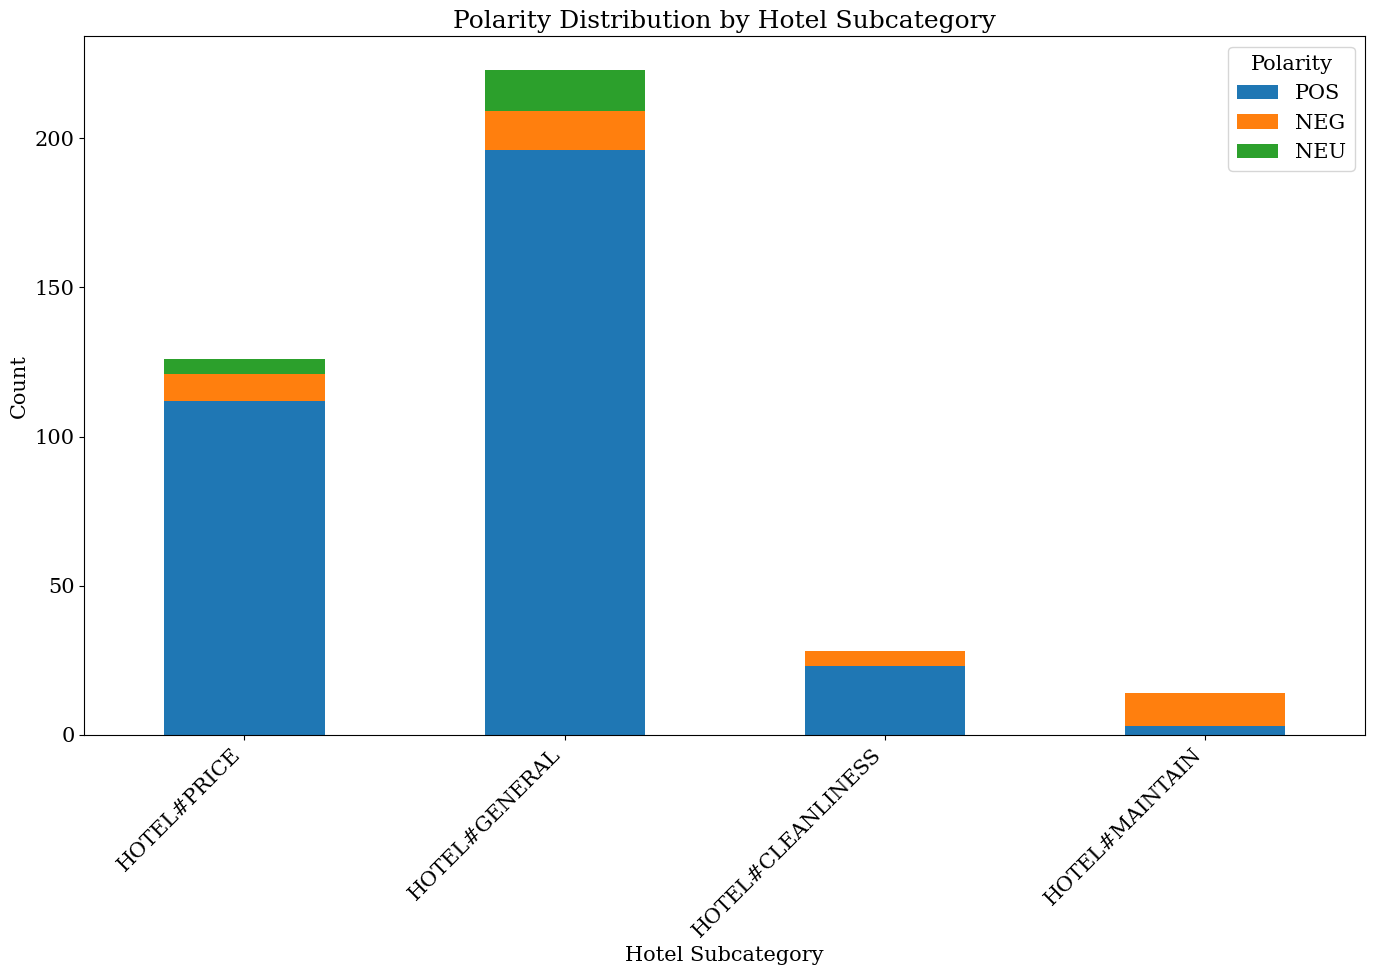

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import ast

hotel_subcategories = defaultdict(Counter)

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category']
        if category.startswith('HOTEL#'):  # Filter only hotel-related categories
            polarity = quad['polarity']
            hotel_subcategories[category][polarity] += 1

# Convert to a DataFrame for visualization
hotel_subcategory_df = pd.DataFrame(hotel_subcategories).fillna(0).astype(int).T

# Plot the polarity distribution for each subcategory
ax = hotel_subcategory_df.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Polarity Distribution by Hotel Subcategory')
plt.xlabel('Hotel Subcategory')
plt.ylabel('Count')
plt.legend(title='Polarity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

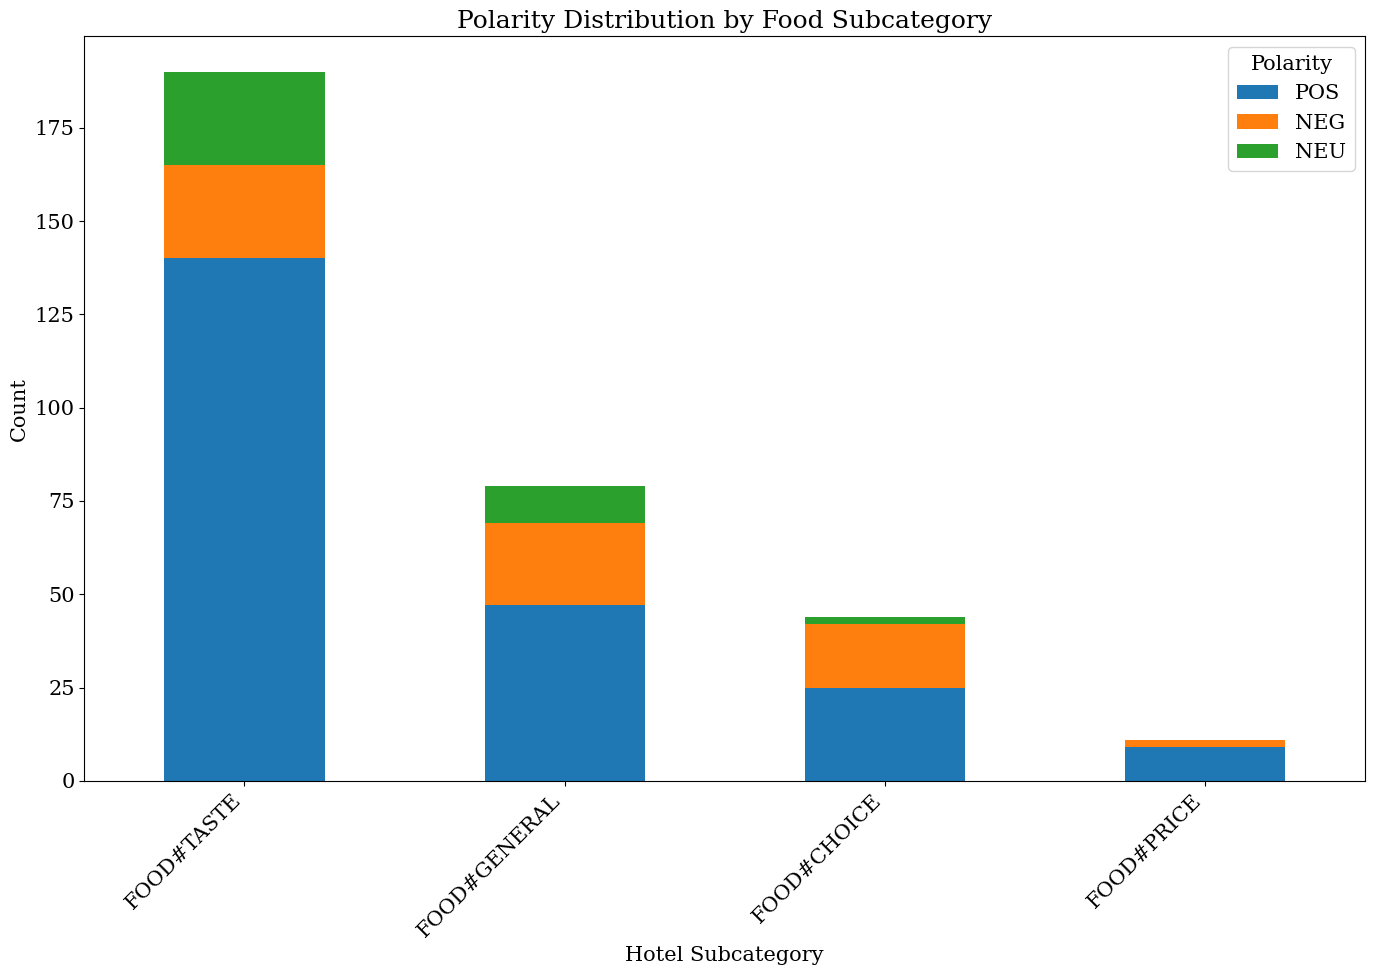

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import ast

hotel_subcategories = defaultdict(Counter)

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category']
        if category.startswith('FOOD#'):  # Filter only hotel-related categories
            polarity = quad['polarity']
            hotel_subcategories[category][polarity] += 1

# Convert to a DataFrame for visualization
hotel_subcategory_df = pd.DataFrame(hotel_subcategories).fillna(0).astype(int).T

# Plot the polarity distribution for each subcategory
ax = hotel_subcategory_df.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Polarity Distribution by Food Subcategory')
plt.xlabel('Hotel Subcategory')
plt.ylabel('Count')
plt.legend(title='Polarity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
pip install wordcloud

In [119]:
from wordcloud import WordCloud

c:\Users\hongk\Documents\GitHub\ta-final-project-aspect-based-sentiment-analysis-and-categorized-aspect\venv-absa-3.9\lib\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='c:\\Users\\hongk\\Documents\\GitHub\\ta-final-project-aspect-based-sentiment-analysis-and-categorized-aspect\\venv-absa-3.9\\lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp1252'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


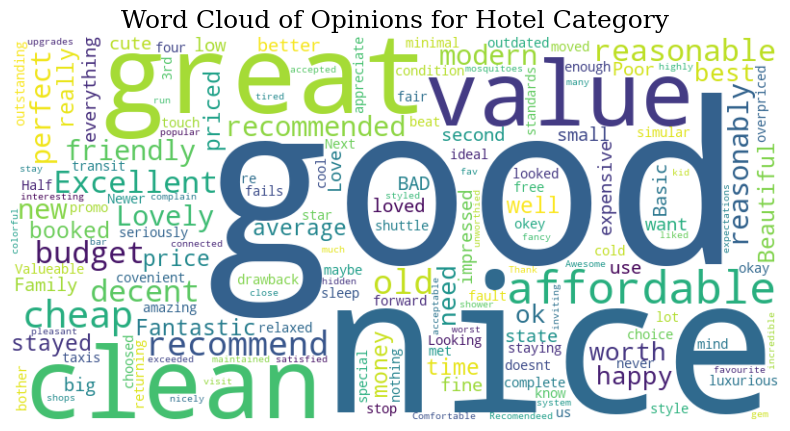

In [120]:

# Assuming df_predictions is already available and the quadruples column is properly formatted
# Convert the 'quadruples' column from string representation to list of dictionaries if necessary
if isinstance(df_predictions['quadruples'].iloc[0], str):
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Filter the opinions for hotel subcategories
hotel_opinions = []

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category']
        if category.startswith('HOTEL#'):  # Filter only hotel-related categories
            opinion = quad['opinion']
            hotel_opinions.append(opinion)

# Join all opinions into a single string
hotel_opinions_text = ' '.join(hotel_opinions)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hotel_opinions_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Opinions for Hotel Category')
plt.axis('off')
plt.show()

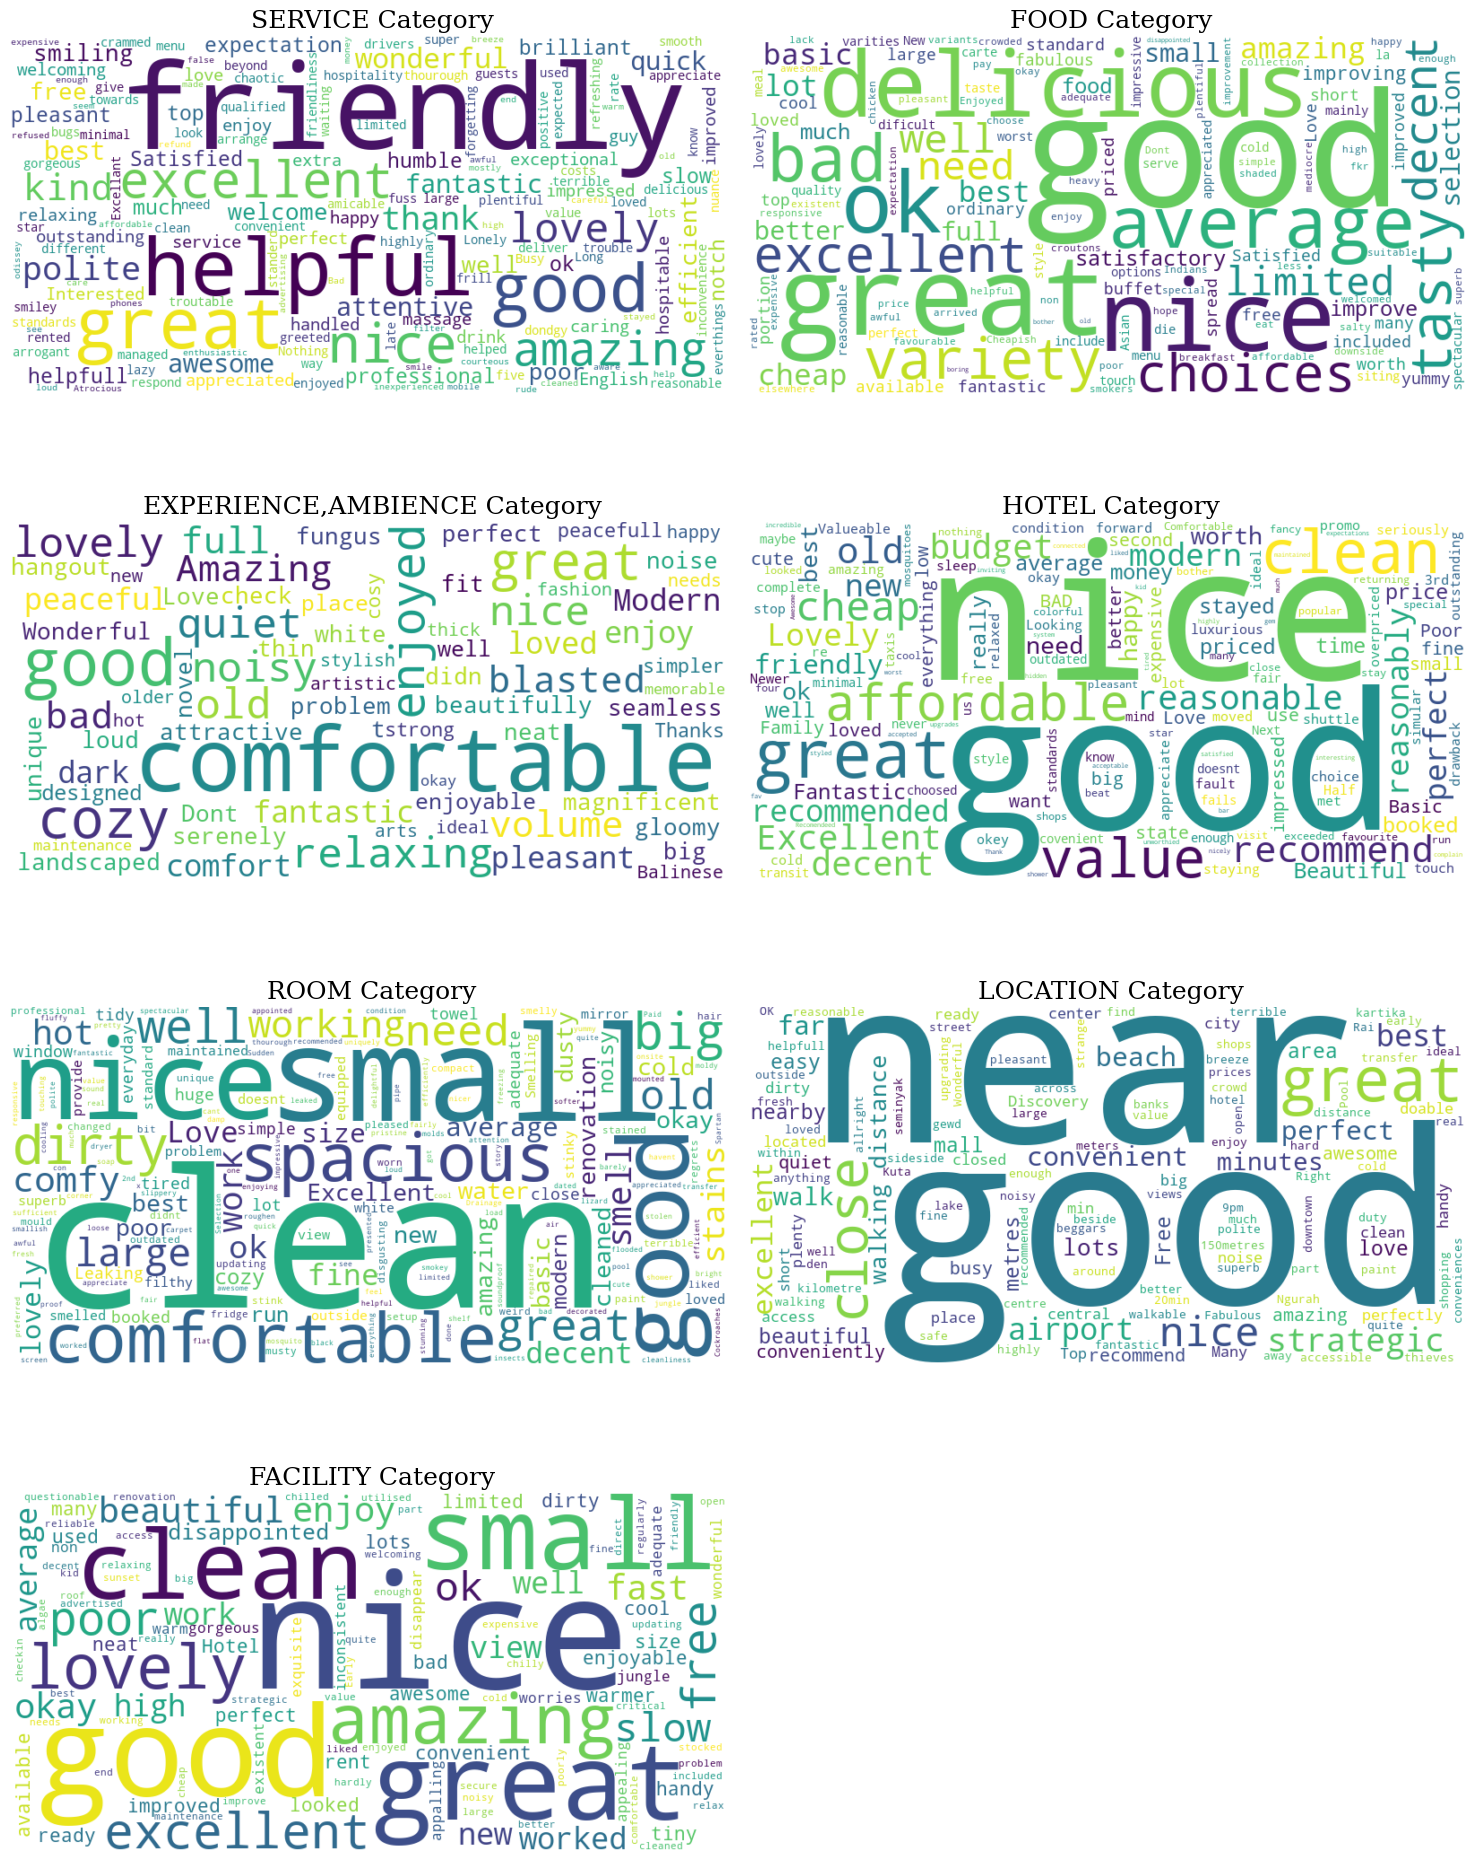

In [127]:
# Ensure the correct column name is used and convert if necessary
if isinstance(df_predictions['quadruples'].iloc[0], str):
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Extract opinions for each main category
category_opinions = defaultdict(list)

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category'].split('#')[0]  # Extract main category
        opinion = quad['opinion']
        category_opinions[category].append(opinion)

# Determine the number of rows and columns for the grid layout
num_categories = len(category_opinions)
cols = 2  # You can adjust this number based on how many columns you want
rows = (num_categories // cols) + (num_categories % cols > 0)

# Generate and display word clouds for each main category
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes for easy iteration if it's a 2D array
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Hide any unused subplots
for i in range(num_categories, len(axes)):
    fig.delaxes(axes[i])

for ax, (category, opinions) in zip(axes, category_opinions.items()):
    opinions_text = ' '.join(opinions)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(opinions_text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f' {category} Category')
    ax.axis('off')

plt.tight_layout()
plt.show()

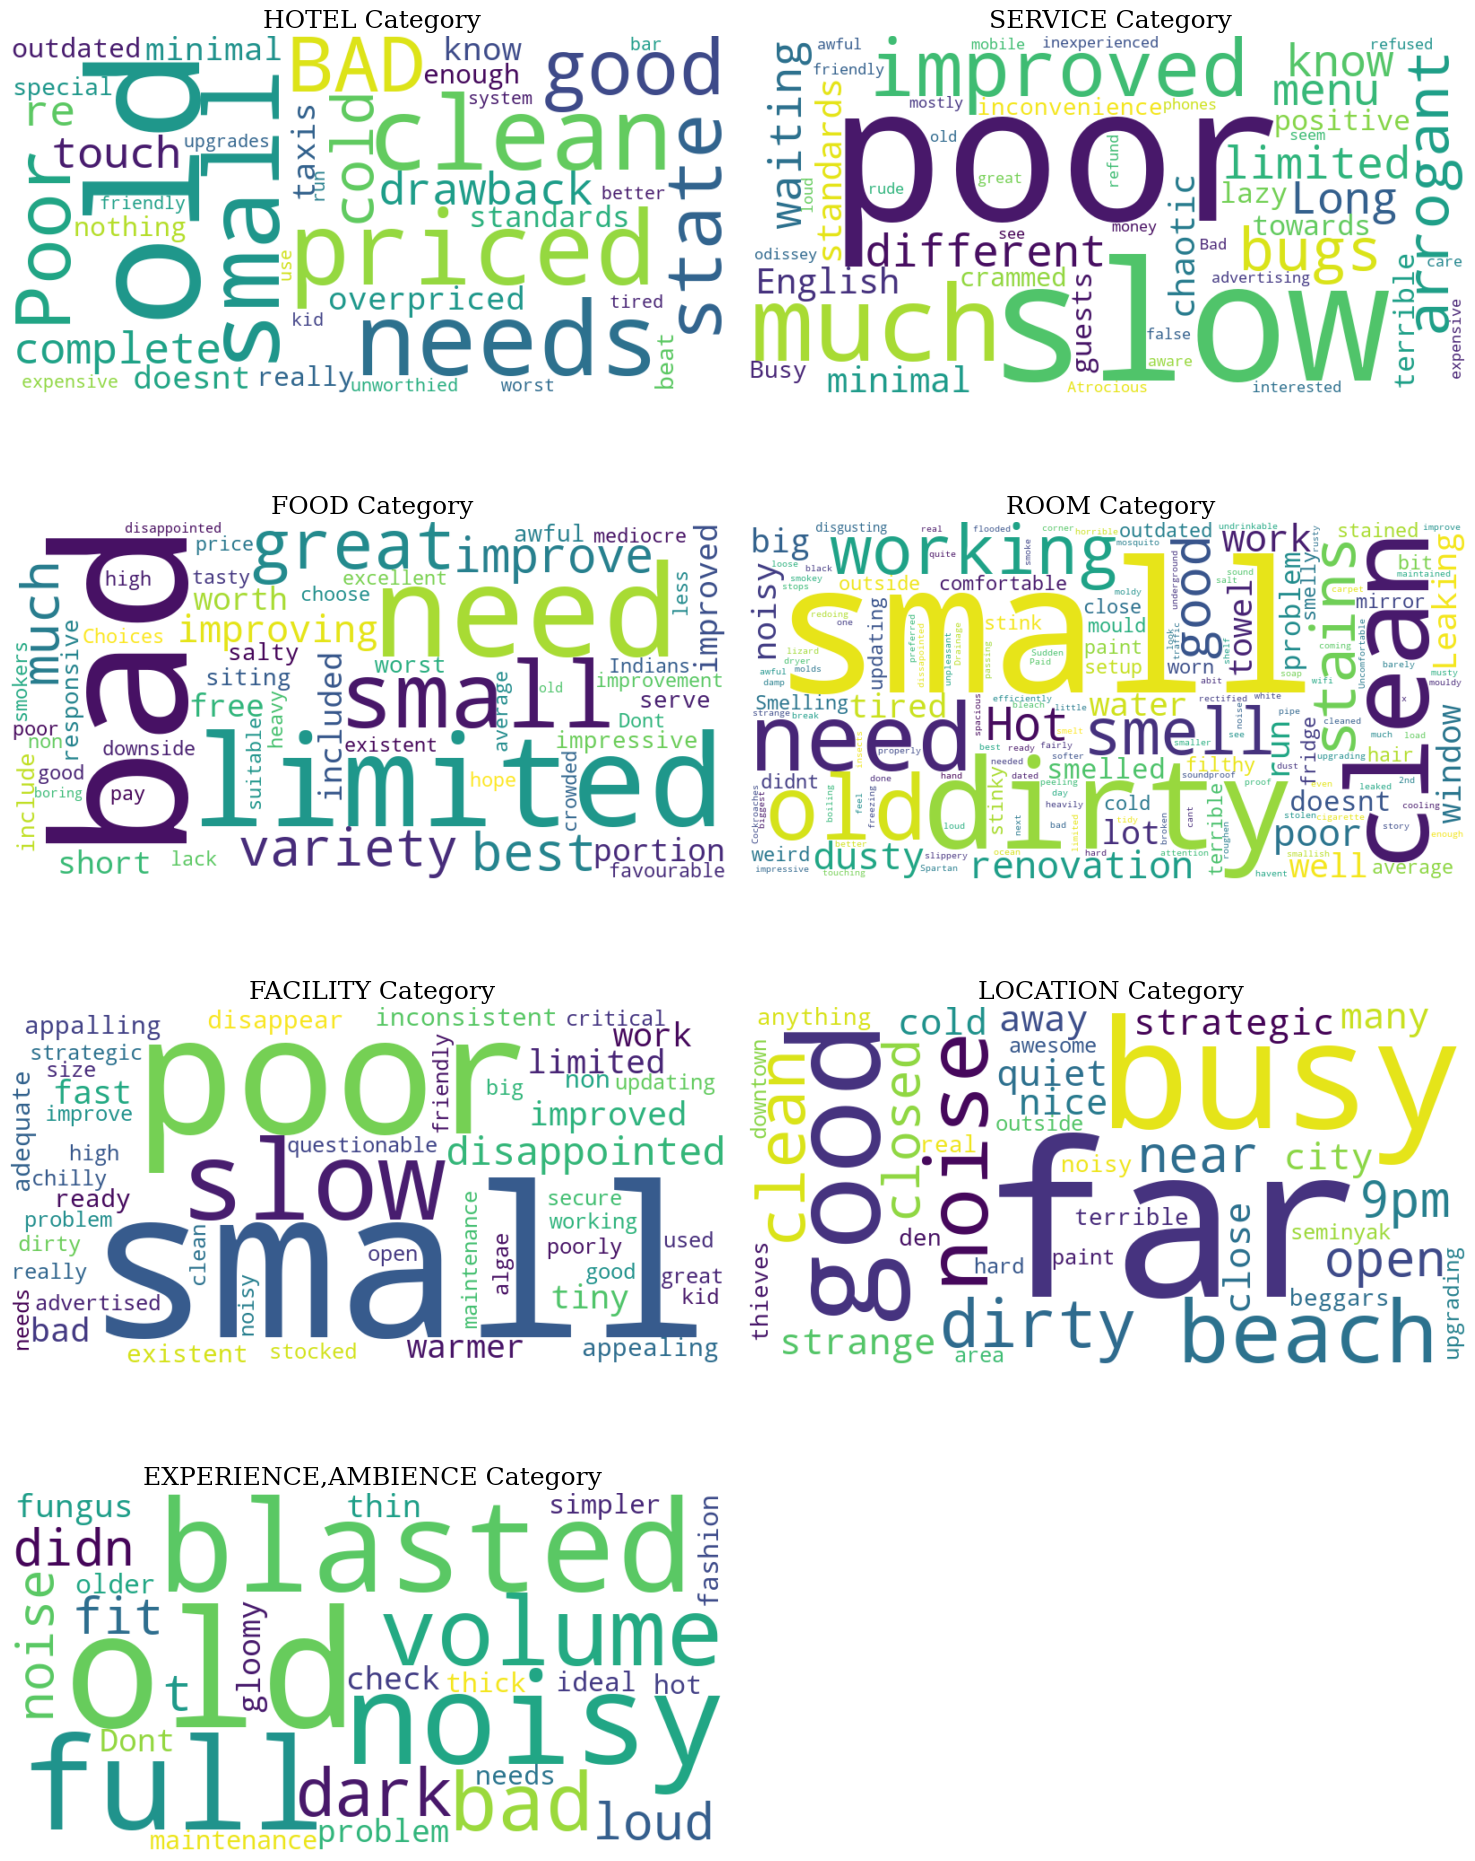

In [130]:
# Ensure the correct column name is used and convert if necessary
if isinstance(df_predictions['quadruples'].iloc[0], str):
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Extract negative opinions for each main category
category_negative_opinions = defaultdict(list)

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category'].split('#')[0]  # Extract main category
        polarity = quad['polarity']
        if polarity == 'NEG':  # Filter only negative polarity
            opinion = quad['opinion']
            category_negative_opinions[category].append(opinion)

# Determine the number of rows and columns for the grid layout
num_categories = len(category_negative_opinions)
cols = 2  # You can adjust this number based on how many columns you want
rows = (num_categories // cols) + (num_categories % cols > 0)

# Generate and display word clouds for each main category with negative polarity
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes for easy iteration if it's a 2D array
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Hide any unused subplots
for i in range(num_categories, len(axes)):
    fig.delaxes(axes[i])

for ax, (category, opinions) in zip(axes, category_negative_opinions.items()):
    opinions_text = ' '.join(opinions)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(opinions_text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f' {category} Category')
    ax.axis('off')

plt.tight_layout()
plt.show()

Top aspects with polarities for SERVICE category:
                       count
aspect       polarity       
staff        POS         290
service      POS          81
staffs       POS          22
spa          POS          13
services     POS          12
room service POS           7
staff        NEG           7
service      NEG           6
hospitality  POS           6
people       POS           5




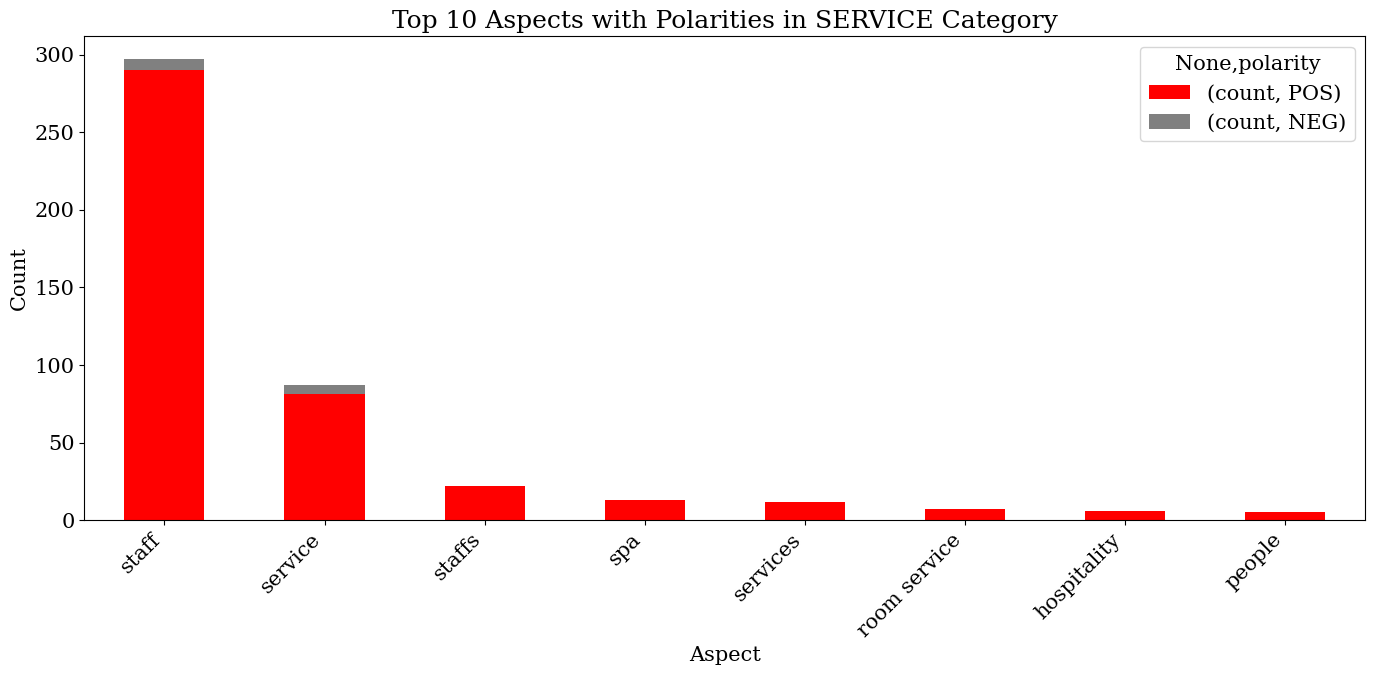

Top aspects with polarities for FOOD category:
                           count
aspect           polarity       
breakfast        POS          82
food             POS          55
breakfast        NEG          30
                 NEU          25
restaurant       POS          10
food             NEG           7
breakfast buffet POS           6
buffet breakfast POS           6
menu             POS           5
food             NEU           5




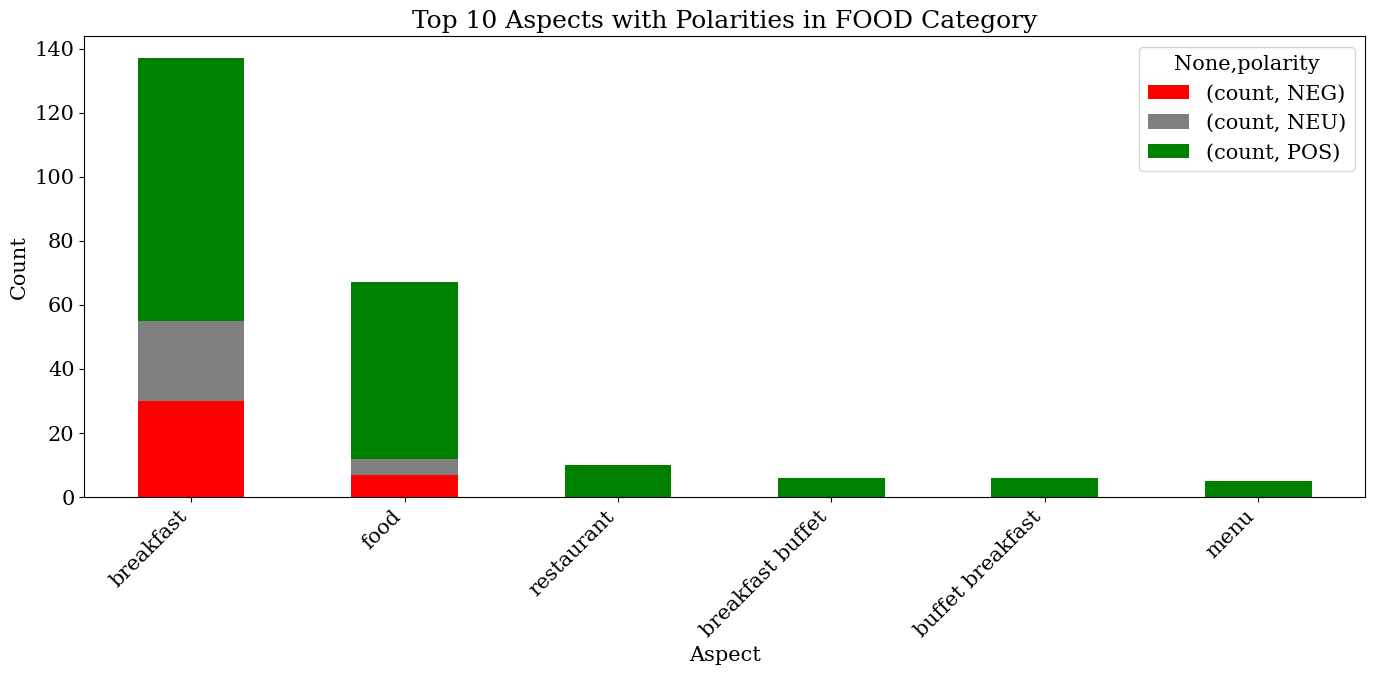

Top aspects with polarities for EXPERIENCE,AMBIENCE category:
                     count
aspect     polarity       
stay       POS          16
room       POS          14
hotel      POS          12
experience POS          11
rooms      POS           8
atmosphere POS           4
room       NEG           4
noise      NEG           3
design     POS           3
ambience   POS           2




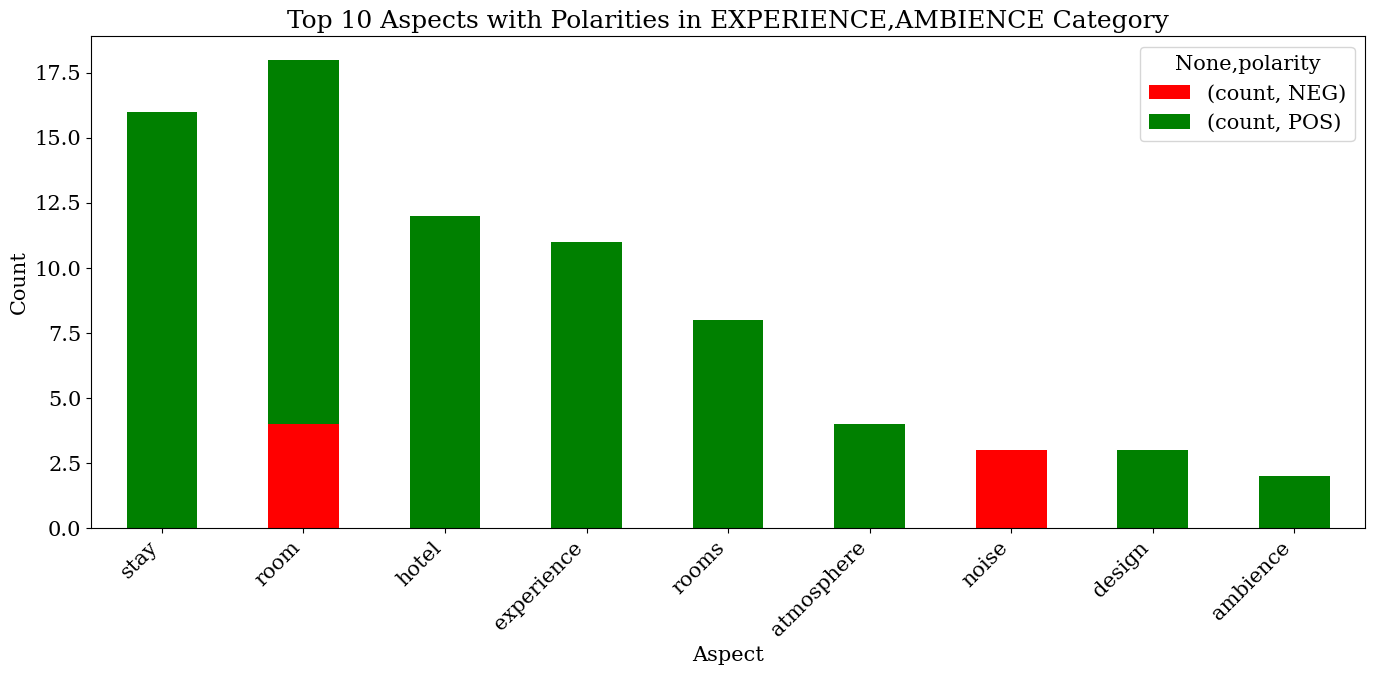

Top aspects with polarities for HOTEL category:
                       count
aspect       polarity       
hotel        POS         153
price        POS          53
place        POS          40
hotel        NEG          21
             NEU          12
money        POS          11
prices       POS           6
budget hotel POS           4
property     POS           4
value        POS           4




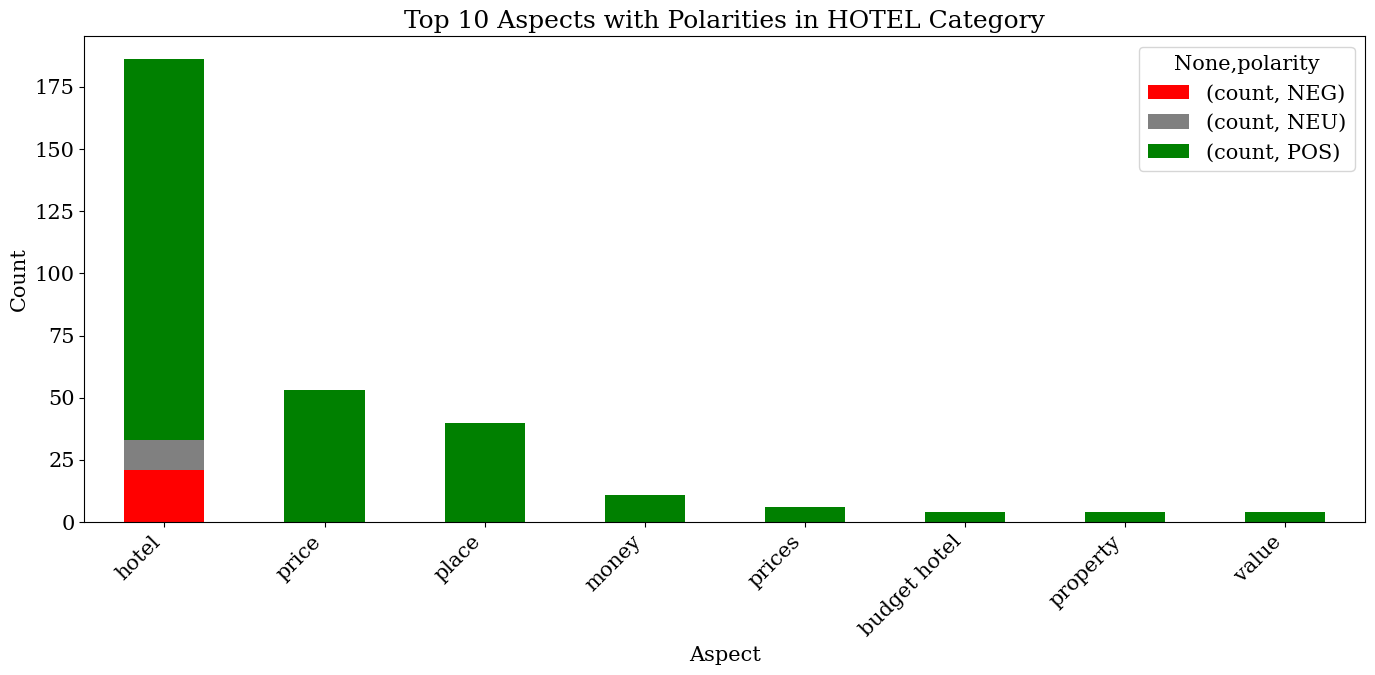

Top aspects with polarities for ROOM category:
                   count
aspect   polarity       
room     POS         147
rooms    POS          93
room     NEG          75
rooms    NEG          42
bed      POS          30
bathroom NEG          22
view     POS          11
shower   NEG          10
beds     POS           9
bathroom POS           8




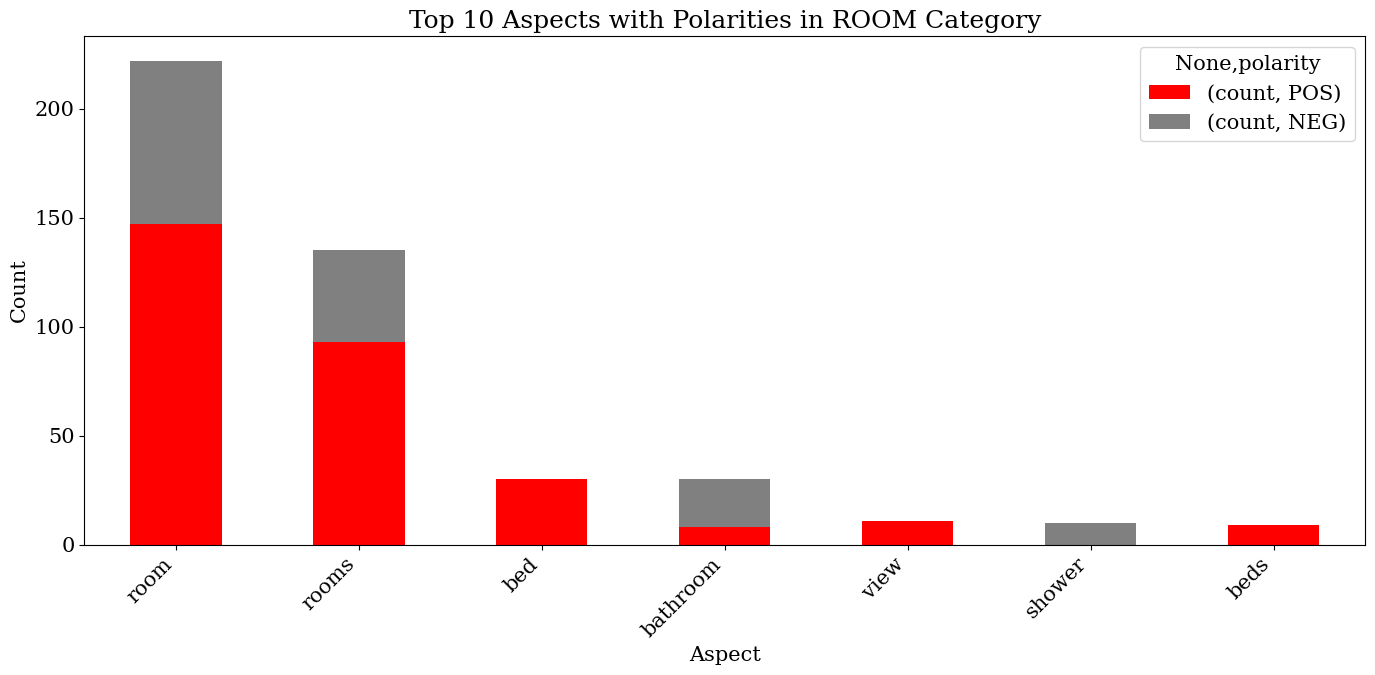

Top aspects with polarities for LOCATION category:
                      count
aspect      polarity       
location    POS         150
beach       POS          25
airport     POS          24
location    NEG          10
located     POS           9
restaurants POS           8
kuta beach  POS           7
view        POS           7
hotel       POS           7
restaurant  POS           7




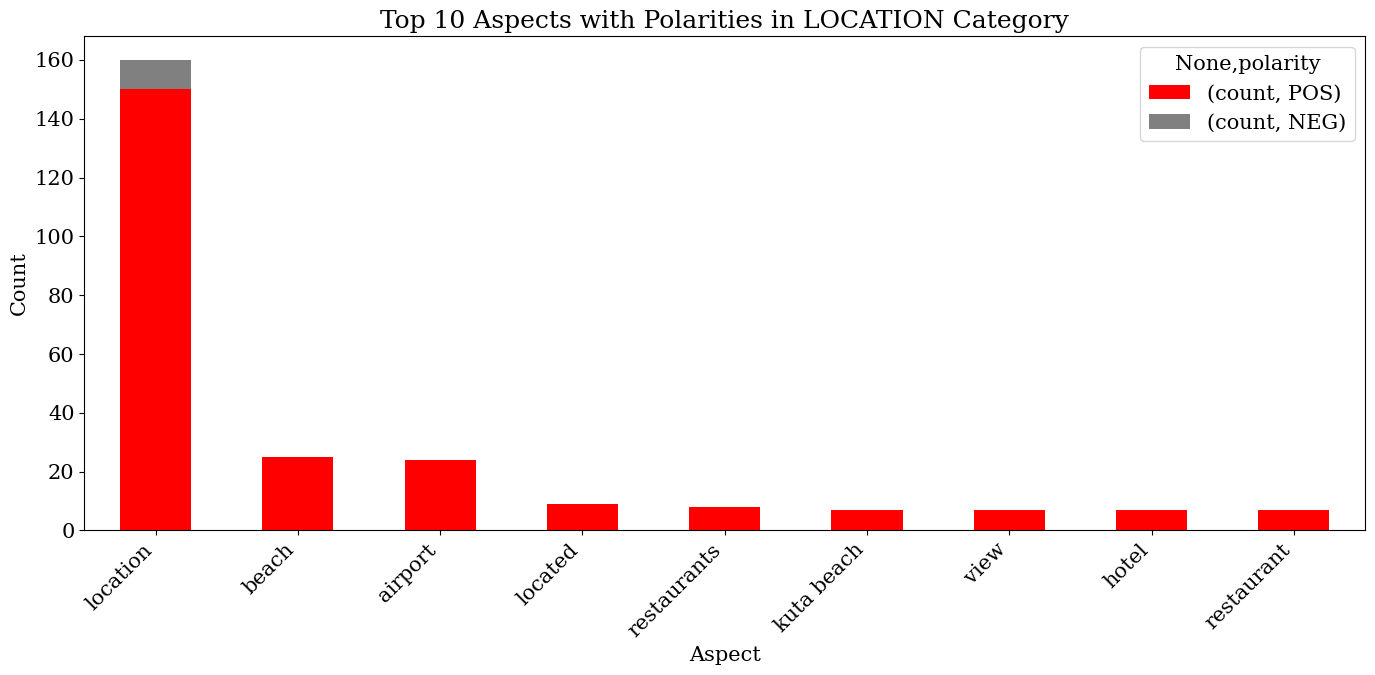

Top aspects with polarities for FACILITY category:
                        count
aspect        polarity       
pool          POS          74
              NEG          19
swimming pool POS          16
facilities    POS          15
wifi          NEG          11
              POS          10
pool area     POS           7
spa           POS           6
pool          NEU           6
rooftop pool  POS           6




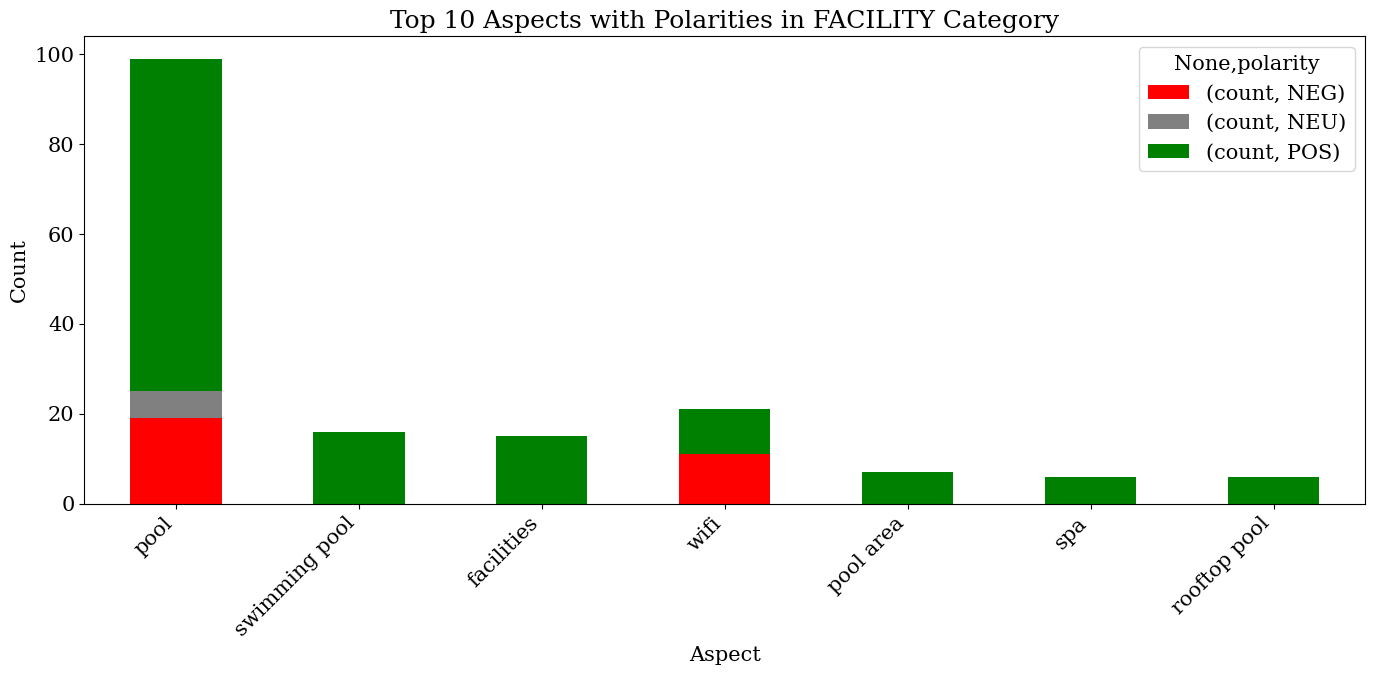

In [149]:
import pandas as pd
from collections import defaultdict, Counter
import ast
import matplotlib.pyplot as plt

# Ensure the correct column name is used and convert if necessary
if isinstance(df_predictions['quadruples'].iloc[0], str):
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Extract and count aspects with polarities for each main category
category_aspect_polarity_counts = defaultdict(Counter)

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category'].split('#')[0]  # Extract main category
        aspect = quad['aspect'].lower()  # Handle aspects case-insensitively
        polarity = quad['polarity']
        aspect_polarity = (aspect, polarity)
        category_aspect_polarity_counts[category][aspect_polarity] += 1

# Prepare data for visualization
category_aspect_polarity_df = {}

for category, aspect_polarity_counter in category_aspect_polarity_counts.items():
    # Convert to DataFrame and sort by count
    aspect_polarity_df = pd.DataFrame.from_dict(aspect_polarity_counter, orient='index', columns=['count']).sort_values(by='count', ascending=False)
    aspect_polarity_df.index = pd.MultiIndex.from_tuples(aspect_polarity_df.index, names=['aspect', 'polarity'])
    category_aspect_polarity_df[category] = aspect_polarity_df

# Define colors for each polarity
colors = {
    'POS': 'green',
    'NEG': 'red',
    'NEU': 'gray'
}

# Display the ranked aspects with polarities for each main category
for category, aspect_polarity_df in category_aspect_polarity_df.items():
    print(f"Top aspects with polarities for {category} category:")
    print(aspect_polarity_df.head(10))  # Display top 10 aspects for each category
    print("\n")

    # Prepare data for plotting
    top_aspects = aspect_polarity_df.head(10)
    top_aspects_unstacked = top_aspects.unstack().fillna(0)

    # Ensure consistent colors for the polarities
    if isinstance(top_aspects_unstacked.columns, pd.MultiIndex):
        polarity_levels = top_aspects_unstacked.columns.levels[1]
    else:
        polarity_levels = top_aspects_unstacked.columns

    # Assign colors based on polarity
    assigned_colors = [colors.get(polarity, 'blue') for polarity in polarity_levels]

    # Plot the ranked aspects with polarities for each category
    ax = top_aspects_unstacked.plot(
        kind='bar', 
        stacked=True, 
        figsize=(14, 7), 
        color=assigned_colors
    )
    plt.title(f'Top 10 Aspects with Polarities in {category} Category')
    plt.xlabel('Aspect')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Top aspects with polarities for SERVICE category:
                       count
aspect       polarity       
staff        POS         290
service      POS          81
staffs       POS          22
spa          POS          13
services     POS          12
room service POS           7
staff        NEG           7
service      NEG           6
hospitality  POS           6
people       POS           5


KeyError: 'NEU'

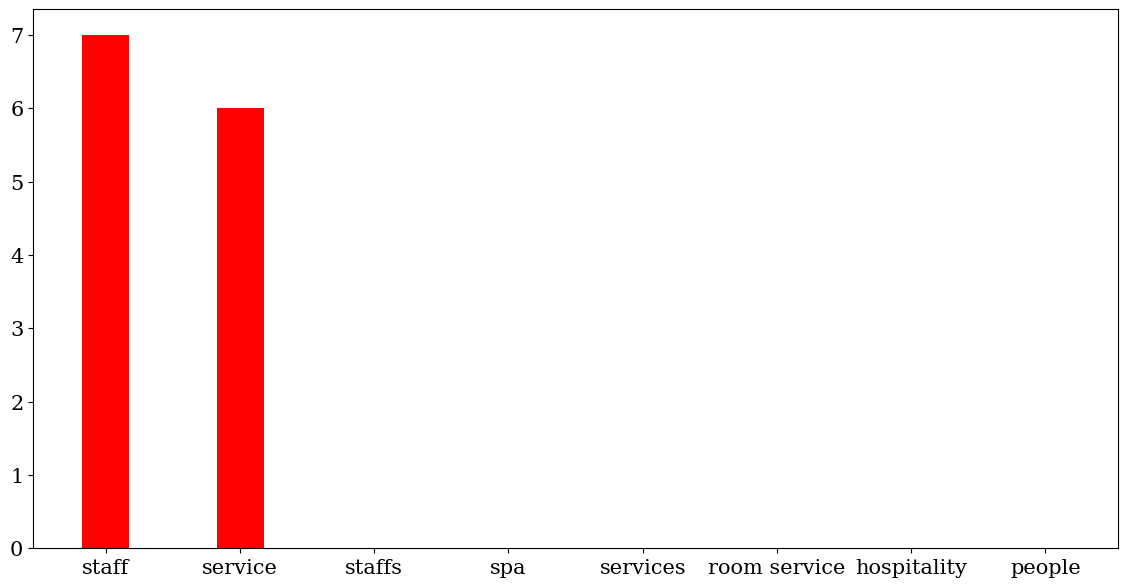

In [152]:
import pandas as pd
from collections import Counter
import ast
import matplotlib.pyplot as plt

# Ensure the correct column name is used and convert if necessary
if isinstance(df_predictions['quadruples'].iloc[0], str):
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Extract and count aspects with polarities for the SERVICE category
service_aspect_polarity_counts = Counter()

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category'].split('#')[0]  # Extract main category
        if category == 'SERVICE':  # Filter for SERVICE category
            aspect = quad['aspect'].lower()  # Handle aspects case-insensitively
            polarity = quad['polarity']
            aspect_polarity = (aspect, polarity)
            service_aspect_polarity_counts[aspect_polarity] += 1

# Convert to DataFrame and sort by count
service_aspect_polarity_df = pd.DataFrame.from_dict(service_aspect_polarity_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)
service_aspect_polarity_df.index = pd.MultiIndex.from_tuples(service_aspect_polarity_df.index, names=['aspect', 'polarity'])

# Define colors for each polarity
colors = {
    'POS': 'green',
    'NEG': 'red',
    'NEU': 'gray'
}

# Display the ranked aspects with polarities for the SERVICE category
print("Top aspects with polarities for SERVICE category:")
print(service_aspect_polarity_df.head(10))  # Display top 10 aspects

# Prepare data for plotting
top_aspects = service_aspect_polarity_df.head(10)
top_aspects_unstacked = top_aspects.unstack().fillna(0)

# Ensure consistent colors for the polarities
if isinstance(top_aspects_unstacked.columns, pd.MultiIndex):
    polarity_levels = top_aspects_unstacked.columns.levels[1]
else:
    polarity_levels = top_aspects_unstacked.columns

# Plot the ranked aspects with polarities for the SERVICE category
fig, ax = plt.subplots(figsize=(14, 7))
width = 0.35  # the width of the bars

# Generate bars for each polarity
for i, polarity in enumerate(polarity_levels):
    ax.bar(top_aspects_unstacked.index, top_aspects_unstacked[('count', polarity)] if ('count', polarity) in top_aspects_unstacked else top_aspects_unstacked[polarity], width, label=polarity, color=colors.get(polarity, 'blue'))

ax.set_title('Top 10 Aspects with Polarities in SERVICE Category')
ax.set_xlabel('Aspect')
ax.set_ylabel('Count')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [141]:
# Ensure the correct column name is used and convert if necessary
if isinstance(df_predictions['quadruples'].iloc[0], str):
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Filter the DataFrame based on the category, opinion, and polarity
filtered_data = []

for index, row in df_predictions.iterrows():
    for quad in row['quadruples']:
        category = quad['category']
        opinion = quad['opinion']
        polarity = quad['polarity']
        if category.startswith('ROOM#') and 'clean' in opinion.lower() and polarity == 'NEG':  # Filter for 'location' categories, opinions containing 'good', and negative polarity
            filtered_data.append(row)
            break  # No need to check other quadruples in this row

# Convert the filtered data to a DataFrame for better visualization
filtered_df = pd.DataFrame(filtered_data)

# Display the filtered DataFrame
print(filtered_df)
# Save the filtered DataFrame to a CSV file for better inspection
filtered_df.to_csv('filtered_location_negative_opinions.csv', index=False)

                                                   text  \
61    All staffs are really friendly and attentive ,...   
381                The rooms was clean but very small .   
419   The room is nice and and very clean , though s...   
453   The rooms were simple and adequately clean - t...   
530   Room wasn ' t too clean and the aircon very no...   
650   The room also didnt feel clean enoughNo noise ...   
1237  It has a strong artistic Balinese exterior , h...   
1253  Such ashame that rooms are not well cleaned an...   
1259                 But so too bad room is not clean .   
1294  Ur toilet not clean , ur bedsheet not clean , ...   
1408  comfortable and near to beach , shopping mall ...   
1428  Rooms and restaurant would benefit from upgrad...   
1564  the hotel location is good but the breakfast m...   
1680              Nobody was there and no clean towel .   

                                             quadruples  
61    [{'aspect': 'staffs', 'polarity': 'POS', 'opin... 

In [147]:
predictions

[{'text': 'Suk su ma ! Overall Melia staff were amazing ! .',
  'Quadruples': [{'aspect': 'staff',
    'polarity': 'POS',
    'opinion': 'amazing',
    'category': 'SERVICE#GENERAL'}]},
 {'text': 'Great food , drinks , atmosphere and the service was amazing .',
  'Quadruples': [{'aspect': 'food',
    'polarity': 'POS',
    'opinion': 'Great',
    'category': 'FOOD#TASTE'},
   {'aspect': 'drinks',
    'polarity': 'POS',
    'opinion': 'Great',
    'category': 'FOOD#TASTE'},
   {'aspect': 'atmosphere',
    'polarity': 'POS',
    'opinion': 'Great',
    'category': 'EXPERIENCE,AMBIENCE'},
   {'aspect': 'service',
    'polarity': 'POS',
    'opinion': 'amazing',
    'category': 'SERVICE#GENERAL'}]},
 {'text': 'Big thanks to all the staff and especially Pringga who always had a smile on his face and went out of his way to make sure we had the best stay possible .',
  'Quadruples': [{'aspect': 'staff',
    'polarity': 'POS',
    'opinion': 'thanks',
    'category': 'SERVICE#GENERAL'}]},
 {'t

In [134]:
import pandas as pd
import ast

# Ensure the correct column name is used and convert if necessary
if isinstance(df_predictions['quadruples'].iloc[0], str):
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Filter the DataFrame based on the category, opinion, and polarity
filtered_data = []

for index, row in df_predictions.iterrows():
    for quad in row['quadruples']:
        category = quad['category']
        opinion = quad['opinion']
        polarity = quad['polarity']
        if category.startswith('LOCATION#') and 'good' in opinion.lower() and polarity == 'NEG':  # Filter for 'location' categories, opinions containing 'good', and negative polarity
            filtered_data.append(row)
            break  # No need to check other quadruples in this row

# Convert the filtered data to a DataFrame for better visualization
filtered_df = pd.DataFrame(filtered_data)

# Display the filtered DataFrame
print(filtered_df)

                                                   text  \
345   walkable to seminyak beach but you do need car...   
1083  Location is not too good , if you like walking...   

                                             quadruples  
345   [{'aspect': 'seminyak beach', 'polarity': 'POS...  
1083  [{'aspect': 'Location', 'polarity': 'NEG', 'op...  
2


                           count
ROOM#BATHROOM                 82
ROOM#CLEANLINESS              54
ROOM#SPACE                    52
SERVICE#GENERAL               41
ROOM#GENERAL                  32
FACILITY#POOL                 31
FACILITY#WIFI                 28
EXPERIENCE,AMBIENCE           28
FOOD#TASTE                    25
FOOD#GENERAL                  22
LOCATION#GENERAL              21
FOOD#CHOICE                   17
ROOM#AIRCON                   17
ROOM#BED                      16
FACILITY#GENERAL              16
ROOM#MAINTAIN                 14
HOTEL#GENERAL                 13
ROOM#FACILITY                 11
HOTEL#MAINTAIN                11
HOTEL#PRICE                    9
HOTEL#CLEANLINESS              5
ROOM#WINDOW                    5
LOCATION#NEARBY_AMENITIES      4
ROOM#VIEW                      3
LOCATION#ENTERTAINMENT         3
FOOD#PRICE                     2
LOCATION#VIEW                  2
ROOM#FACILITY#MAINTAIN         1
ROOM#FACILITY#WIFI             1
FACILITY#M

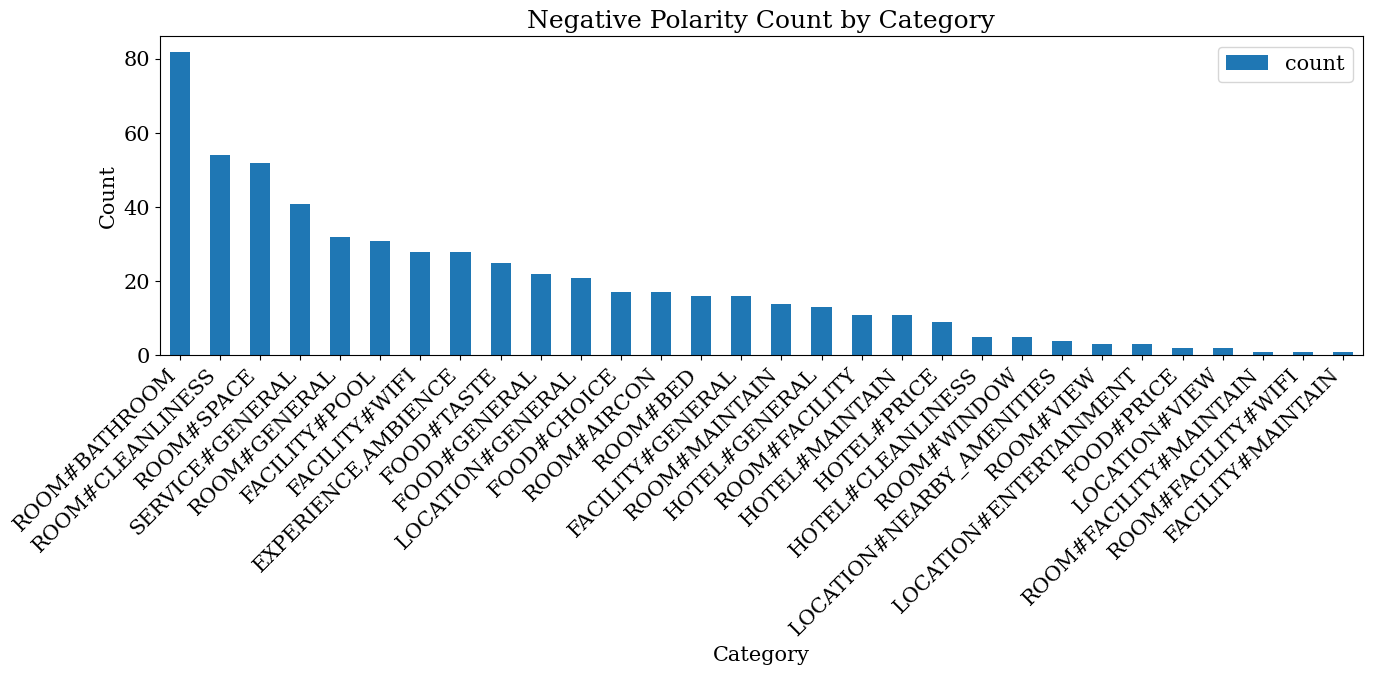

In [121]:
# Assuming df_predictions is already available and the quadruples column is properly formatted
# Convert the 'quadruples' column from string representation to list of dictionaries if necessary
if isinstance(df_predictions['quadruples'].iloc[0], str):
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Extract polarity and category values
negative_polarity_counts = Counter()

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category']
        polarity = quad['polarity']
        if polarity == 'NEG':  # Filter only negative polarity
            negative_polarity_counts[category] += 1

# Convert to a DataFrame for ranking
negative_polarity_df = pd.DataFrame.from_dict(negative_polarity_counts, orient='index', columns=['count'])

# Sort the DataFrame based on the count of negative polarity in descending order
negative_polarity_df = negative_polarity_df.sort_values(by='count', ascending=False)

# Display the ranked categories
print(negative_polarity_df)

# Optional: Plot the ranked categories
negative_polarity_df.plot(kind='bar', figsize=(14, 7))
plt.title('Negative Polarity Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                     count
ROOM                   288
FACILITY                76
FOOD                    66
SERVICE                 41
HOTEL                   38
LOCATION                30
EXPERIENCE,AMBIENCE     28


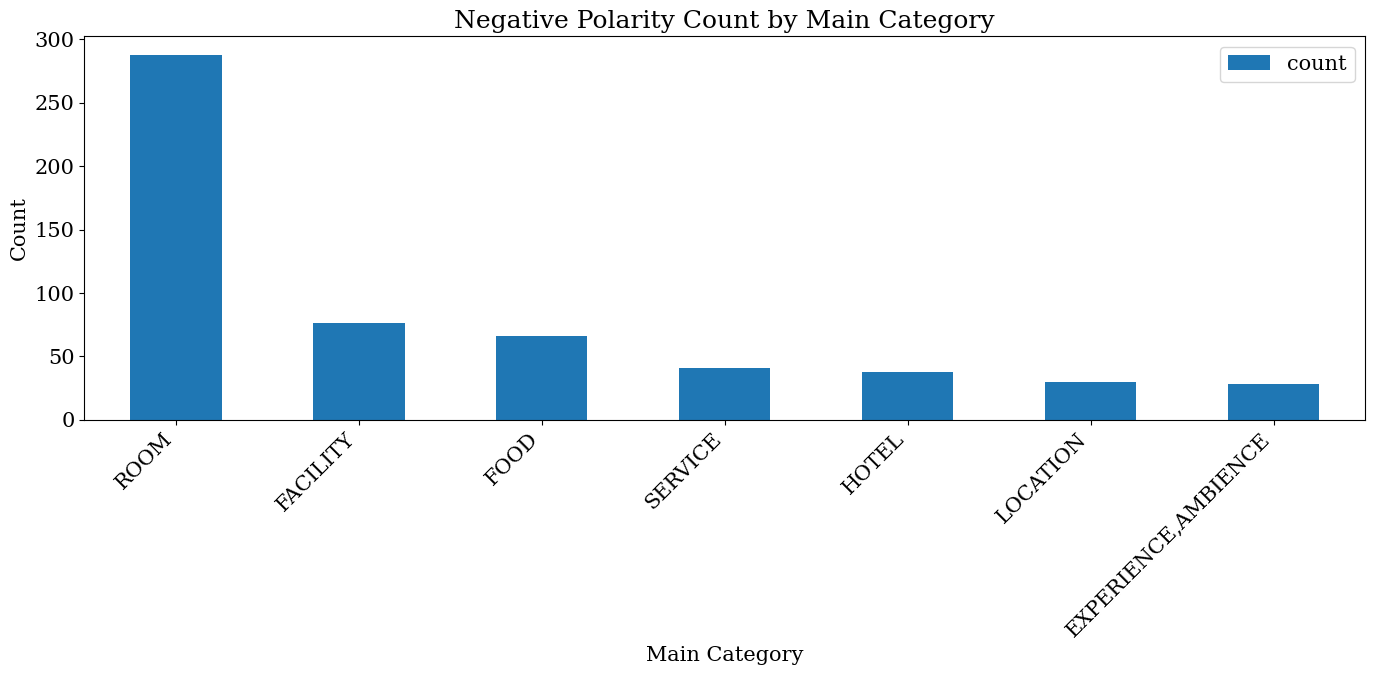

In [122]:
# Assuming df_predictions is already available and the quadruples column is properly formatted
# Convert the 'quadruples' column from string representation to list of dictionaries if necessary
if isinstance(df_predictions['quadruples'].iloc[0], str):
    df_predictions['quadruples'] = df_predictions['quadruples'].apply(ast.literal_eval)

# Extract polarity and main category values
negative_polarity_counts = Counter()

for quads in df_predictions['quadruples']:
    for quad in quads:
        category = quad['category'].split('#')[0]  # Extract main category
        polarity = quad['polarity']
        if polarity == 'NEG':  # Filter only negative polarity
            negative_polarity_counts[category] += 1

# Convert to a DataFrame for ranking
negative_polarity_df = pd.DataFrame.from_dict(negative_polarity_counts, orient='index', columns=['count'])

# Sort the DataFrame based on the count of negative polarity in descending order
negative_polarity_df = negative_polarity_df.sort_values(by='count', ascending=False)

# Display the ranked categories
print(negative_polarity_df)

# Optional: Plot the ranked categories
negative_polarity_df.plot(kind='bar', figsize=(14, 7))
plt.title('Negative Polarity Count by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [73]:
local_model_directory = "checkpoints/multitask/kevinscaria/ate_tk-instruct-base-def-pos-neg-neut-combined-ss-less-cat"  # Change this to the actual path where your model is stored

In [34]:
import numpy as np

# Load the .npz file
file_path = 'prediction_labels.npz'
npz_file = np.load(file_path)

# Extract the arrays and assign them to specific variables
id_tr_labels = npz_file['id_tr_labels']
id_tr_pred_labels = npz_file['id_tr_pred_labels']
id_te_labels = npz_file['id_te_labels']
id_te_pred_labels = npz_file['id_te_pred_labels']

# Convert the arrays to lists
id_tr_labels_list = id_tr_labels.tolist()
id_tr_pred_labels_list = id_tr_pred_labels.tolist()
id_te_labels_list = id_te_labels.tolist()
id_te_pred_labels_list = id_te_pred_labels.tolist()

# Print shapes of the arrays to confirm they have been loaded correctly
print("id_tr_labels shape:", id_tr_labels.shape)
print("id_tr_pred_labels shape:", id_tr_pred_labels.shape)
print("id_te_labels shape:", id_te_labels.shape)
print("id_te_pred_labels shape:", id_te_pred_labels.shape)

# Print the type to confirm conversion to list
print("Type of id_tr_labels_list:", type(id_tr_labels_list))
print("Type of id_tr_pred_labels_list:", type(id_tr_pred_labels_list))
print("Type of id_te_labels_list:", type(id_te_labels_list))
print("Type of id_te_pred_labels_list:", type(id_te_pred_labels_list))

id_tr_labels shape: (22704,)
id_tr_pred_labels shape: (22704,)
id_te_labels shape: (1604,)
id_te_pred_labels shape: (1604,)
Type of id_tr_labels_list: <class 'list'>
Type of id_tr_pred_labels_list: <class 'list'>
Type of id_te_labels_list: <class 'list'>
Type of id_te_pred_labels_list: <class 'list'>


In [66]:
def cat_extraction(all_labels_list):
    cat_list = []
    for i in range(-1, len(all_labels_list), 4):
        cat_list.append(all_labels_list[i])
    return cat_list

# Menggunakan fungsi untuk mengekstrak kategori dari daftar yang berbeda
id_tr_pred_labels_cat_only = cat_extraction(id_tr_pred_labels_list)
id_tr_labels_cat_only = cat_extraction(id_tr_labels_list)
id_te_labels_cat_only = cat_extraction(id_te_labels_list)
id_te_pred_labels_cat_only = cat_extraction(id_te_pred_labels_list)

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [71]:
# Define a function to calculate and print metrics
def calculate_metrics(true_labels, pred_labels):
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')
    f1 = f1_score(true_labels, pred_labels, average='weighted')
    
        # Print true and predicted labels
    print("\nTrue and Predicted Labels:")
    for true, pred in zip(true_labels, pred_labels):
        print(f"True: {true}, Predicted: {pred}")
        
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

# Calculate metrics for training data
print("Metrics for Training Data:")
calculate_metrics(id_tr_labels_cat_only, id_tr_pred_labels_cat_only)

# Calculate metrics for testing data
print("\nMetrics for Testing Data:")
calculate_metrics(id_te_labels_cat_only, id_te_pred_labels_cat_only)

Metrics for Training Data:


c:\Users\hongk\Documents\GitHub\ta-final-project-aspect-based-sentiment-analysis-and-categorized-aspect\venv-absa-3.9\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hongk\Documents\GitHub\ta-final-project-aspect-based-sentiment-analysis-and-categorized-aspect\venv-absa-3.9\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



True and Predicted Labels:
True: stay:HOTEL#GENERAL, Predicted: stay:EXPERIENCE,AMBIENCE
True: room::ROOM#SPACE|room::FACILITY#WIFI, Predicted: room::EXPERIENCE,AMBIENCE|room::EXPERIENCE,AMBIENCE
True: swimmingpool:FACILITY#POOL|look:EXPERIENCE,AMBIENCE|swimmingpool:FACILITY#POOL, Predicted: swimmingpool:FACILITY#POOL|look:EXPERIENCE,AMBIENCE
True: poolfacilities:EXPERIENCE,AMBIENCE, Predicted: poolfacilities:FACILITY#POOL
True: Breakfast:FOOD#TASTE, Predicted: Breakfast:FOOD#TASTE
True: room:EXPERIENCE,AMBIENCE|staff:SERVICE#GENERAL, Predicted: room:EXPERIENCE,AMBIENCE|staff:SERVICE#GENERAL
True: breakfast:FOOD#CHOICE, Predicted: breakfast:FOOD#CHOICE
True: staffs:SERVICE#GENERAL|staffs:SERVICE#GENERAL, Predicted: staffs:SERVICE#GENERAL|staffs:SERVICE#GENERAL
True: internetspeed:FACILITY#WIFI|deal:HOTEL#PRICE, Predicted: internetspeed:FACILITY#WIFI|deal:HOTEL#PRICE
True: pool:FACILITY#POOL, Predicted: pool:FACILITY#POOL
True: hotel:HOTEL#GENERAL|hotel:EXPERIENCE,AMBIENCE|staff:SERVIC

c:\Users\hongk\Documents\GitHub\ta-final-project-aspect-based-sentiment-analysis-and-categorized-aspect\venv-absa-3.9\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hongk\Documents\GitHub\ta-final-project-aspect-based-sentiment-analysis-and-categorized-aspect\venv-absa-3.9\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Calculate metrics for testing data
print("\nMetrics for Testing Data:")
calculate_metrics(id_te_labels_cat_only, id_te_pred_labels_cat_only)


Metrics for Testing Data:

True and Predicted Labels:
True: Staff:SERVICE#GENERAL|room:ROOM#SPACE|room:ROOM#CLEANLINESS|room:EXPERIENCE,AMBIENCE, Predicted: Staff:SERVICE#GENERAL|room:ROOM#SPACE|room:ROOM#CLEANLINESS|room:EXPERIENCE,AMBIENCE
True: pool:FACILITY#POOL, Predicted: pool:FACILITY#POOL
True: staff:SERVICE#GENERAL|staff:SERVICE#GENERAL, Predicted: staff:SERVICE#GENERAL|staff:SERVICE#GENERAL
True: bathrooms:ROOM#BATHROOM, Predicted: bathrooms:ROOM#BATHROOM
True: internet:FACILITY#WIFI, Predicted: internet:FACILITY#WIFI
True: hotel:HOTEL#GENERAL, Predicted: hotel:EXPERIENCE,AMBIENCE|hotel:EXPERIENCE,AMBIENCE
True: staff:SERVICE#GENERAL, Predicted: staff:SERVICE#GENERAL|staff:SERVICE#GENERAL
True: stay:EXPERIENCE,AMBIENCE, Predicted: stay:EXPERIENCE,AMBIENCE
True: rooms:ROOM#SPACE|rooms:ROOM#CLEANLINESS|balcony:ROOM#VIEW, Predicted: rooms:ROOM#SPACE|rooms:ROOM#CLEANLINESS|balcony:ROOM#VIEW
True: internet:FACILITY#WIFI, Predicted: internet:FACILITY#WIFI
True: staff:SERVICE#GENER

c:\Users\hongk\Documents\GitHub\ta-final-project-aspect-based-sentiment-analysis-and-categorized-aspect\venv-absa-3.9\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hongk\Documents\GitHub\ta-final-project-aspect-based-sentiment-analysis-and-categorized-aspect\venv-absa-3.9\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
id_te_pred_labels_cat_only

['Staff:SERVICE#GENERAL|room:ROOM#SPACE|room:ROOM#CLEANLINESS|room:EXPERIENCE,AMBIENCE',
 'pool:FACILITY#POOL',
 'staff:SERVICE#GENERAL|staff:SERVICE#GENERAL',
 'bathrooms:ROOM#BATHROOM',
 'internet:FACILITY#WIFI',
 'hotel:EXPERIENCE,AMBIENCE|hotel:EXPERIENCE,AMBIENCE',
 'staff:SERVICE#GENERAL|staff:SERVICE#GENERAL',
 'stay:EXPERIENCE,AMBIENCE',
 'rooms:ROOM#SPACE|rooms:ROOM#CLEANLINESS|balcony:ROOM#VIEW',
 'internet:FACILITY#WIFI',
 'staff:SERVICE#GENERAL',
 'room:EXPERIENCE,AMBIENCE',
 'staff:SERVICE#GENERAL|pool:FACILITY#POOL',
 'room:ROOM#VIEW',
 'room:ROOM#CLEANLINESS|room:EXPERIENCE,AMBIENCE',
 'facilities:FACILITY#GENERAL|staff:SERVICE#GENERAL',
 'hotel:HOTEL#GENERAL',
 'poolarea:FACILITY#POOL|view:LOCATION#VIEW',
 'Staff:SERVICE#GENERAL',
 'Service:SERVICE#GENERAL|breakfast:FOOD#TASTE',
 'stay:EXPERIENCE,AMBIENCE|stay:EXPERIENCE,AMBIENCE',
 'foods:FOOD#TASTE|staffs:SERVICE#GENERAL|staffs:SERVICE#GENERAL',
 'room:EXPERIENCE,AMBIENCE|room:ROOM#SPACE',
 'terrace:ROOM#SPACE',
 'sta

In [60]:
id_te_pred_labels_cat_only

['Staff:SERVICE#GENERAL|room:ROOM#SPACE|room:ROOM#CLEANLINESS|room:EXPERIENCE,AMBIENCE']

In [33]:
id_tr_pred_labels

array(['room', 'room::NEG', 'room::small|room::nosignal', ..., 'stay:POS',
       'stay:nice', 'stay:EXPERIENCE,AMBIENCE'], dtype='<U346')